In [ ]:
import os
import shutil
import random
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define paths
image_path = '/content/drive/MyDrive/coco_data'
dataset_path = '/content/drive/MyDrive/dataset'

# Create directories for train and val
train_image_dir = os.path.join(dataset_path, 'train/images')
train_label_dir = os.path.join(dataset_path, 'train/labels')
val_image_dir = os.path.join(dataset_path, 'val/images')
val_label_dir = os.path.join(dataset_path, 'val/labels')

os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# Step 3: Get all image files
image_files = [f for f in os.listdir(image_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Step 4: Split images into train and val
train_files = image_files[:100]  # First 100 images for training
val_files = image_files[100:105]  # Next 5 images for validation

# Step 5: Generate random bounding box data
# Assuming all images are of the same size for simplicity
image_width = 640
image_height = 480

# Create a dictionary to hold bounding box data
bounding_boxes = {}

for filename in image_files:
    # Generate random bounding boxes for demonstration
    num_boxes = random.randint(1, 3)  # Randomly choose 1 to 3 boxes per image
    boxes = []
    for _ in range(num_boxes):
        x1 = random.randint(0, image_width - 1)
        y1 = random.randint(0, image_height - 1)
        x2 = random.randint(x1 + 1, image_width)  # Ensure x2 > x1
        y2 = random.randint(y1 + 1, image_height)  # Ensure y2 > y1
        boxes.append((x1, y1, x2, y2))
    bounding_boxes[filename] = boxes

# Function to create labels
def create_labels(image_files, image_dir, label_dir):
    for filename in image_files:
        # Copy the image to the respective directory
        shutil.copy(os.path.join(image_path, filename), os.path.join(image_dir, filename))

        # Create the label file
        label_file_path = os.path.join(label_dir, filename.replace('.jpg', '.txt').replace('.png', '.txt'))
        with open(label_file_path, 'w') as f:
            if filename in bounding_boxes:
                for box in bounding_boxes[filename]:
                    # Convert bounding box from (x1, y1, x2, y2) to YOLO format
                    x1, y1, x2, y2 = box
                    center_x = (x1 + x2) / 2 / image_width  # Normalize by image width
                    center_y = (y1 + y2) / 2 / image_height  # Normalize by image height
                    width = (x2 - x1) / image_width  # Normalize by image width
                    height = (y2 - y1) / image_height  # Normalize by image height

                    # Write to the label file
                    f.write(f"0 {center_x} {center_y} {width} {height}\n")  # Assuming class_id is 0

# Create labels and copy images for training and validation
create_labels(train_files, train_image_dir, train_label_dir)
create_labels(val_files, val_image_dir, val_label_dir)

print("Dataset preparation complete!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset preparation complete!


In [ ]:
# Step 1: Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Step 2: Install required dependencies
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 17075 (delta 27), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17075/17075), 15.68 MiB | 14.88 MiB/s, done.
Resolving deltas: 100% (11717/11717), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 24.5 MB/s eta 0:00:00


In [ ]:
# Prepare the dataset configuration
dataset_yaml = """
train: /content/drive/MyDrive/dataset/train/images
val: /content/drive/MyDrive/dataset/val/images

nc: 81  # number of classes in COCO dataset
names: [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase',
    'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'TV', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]
"""

# Save the YAML file
with open('dataset.yaml', 'w') as f:
    f.write(dataset_yaml)

In [ ]:
!python train.py --img 640 --batch 16 --epochs 25 --data dataset.yaml --weights yolov5s.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-09 10:43:50.524695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-09 10:43:50.567010: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-09 10:43:50.577937: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: sriharshithanvns (sriharshithanvns-malla-reddy-college-of-engi

In [ ]:
# !python train.py --data data/coco128.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --epochs 50

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source /content/sample0.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/sample0.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7228582 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/sample0.jpg: 640x608 (no detections), 393.0ms
Speed: 5.1ms pre-process, 393.0ms inference, 0.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp13


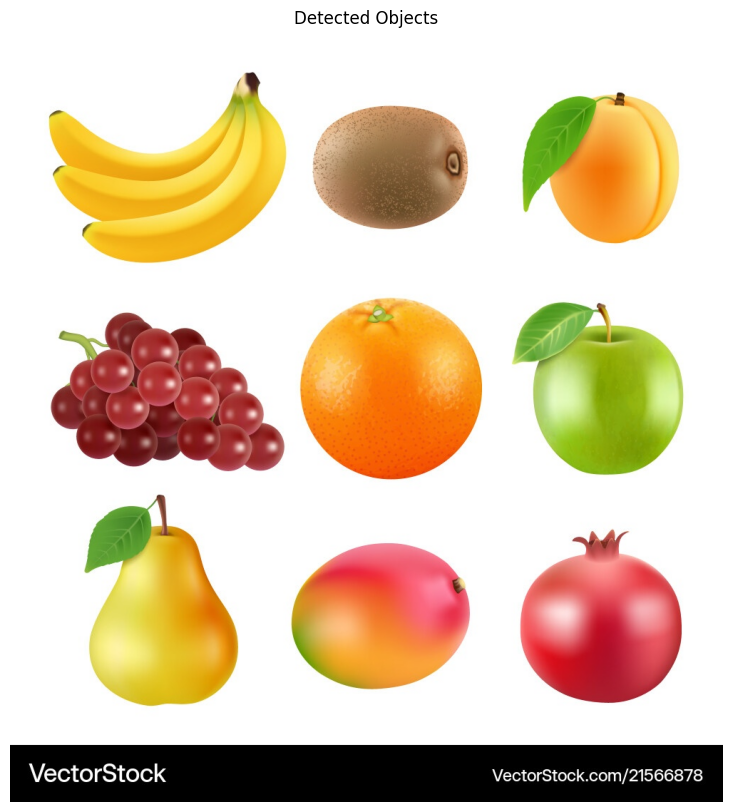

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Path to the output image (adjust the filename if necessary)
output_image_path = 'runs/detect/exp13/sample0.jpg'  # Change 'sample1.jpg' to your input image name if needed

# Read the image
image = cv2.imread(output_image_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and labels
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title('Detected Objects')
plt.show()

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source /content/drive/MyDrive/dataset/train/images/000000064523.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/dataset/train/images/000000064523.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7228582 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/drive/MyDrive/dataset/train/images/000000064523.jpg: 448x640 (no detections), 326.4ms
Speed: 7.1ms pre-process, 326.4ms inference, 2.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


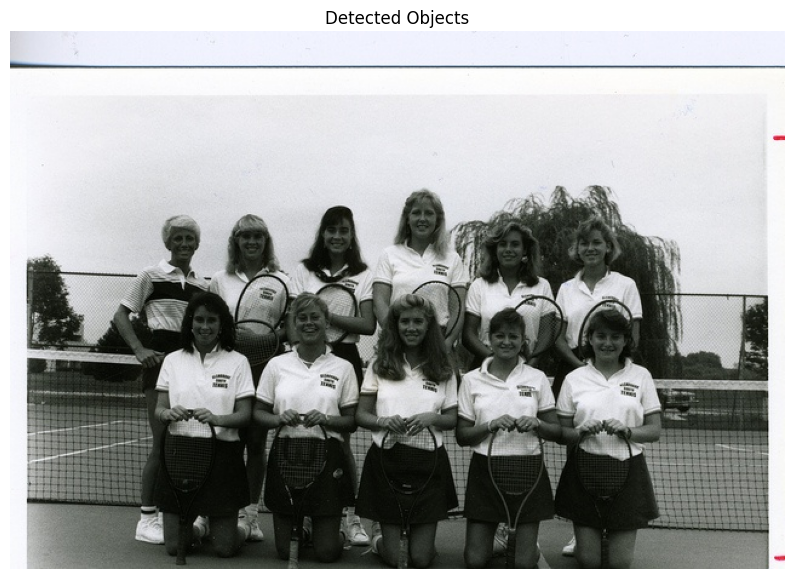

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Path to the output image (adjust the filename if necessary)
output_image_path = 'runs/detect/exp6/000000064523.jpg'  # Change 'sample1.jpg' to your input image name if needed

# Read the image
image = cv2.imread(output_image_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and labels
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title('Detected Objects')
plt.show()

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.0 --source /content/drive/MyDrive/dataset/train/images/000000064523.jpg --save-txt --save-conf


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/dataset/train/images/000000064523.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.0, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7228582 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/drive/MyDrive/dataset/train/images/000000064523.jpg: 448x640 998 __background__s, 2 toasters, 284.2ms
Speed: 2.6ms pre-process, 284.2ms inference, 142.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp16
1 labels saved to runs/detect/exp16/labels


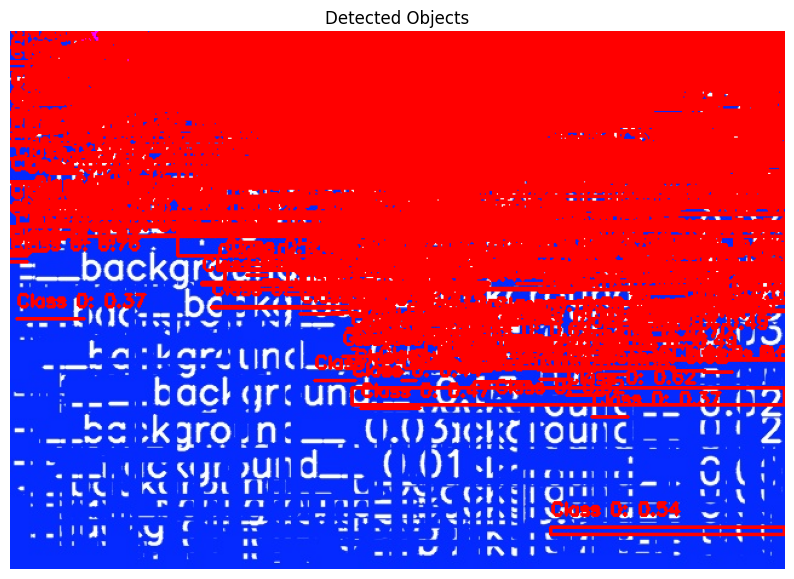

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Define paths
output_image_path = 'runs/detect/exp16/000000064523.jpg'  # Adjust if necessary
label_file_path = 'runs/detect/exp16/labels/000000064523.txt'  # Adjust if necessary

# Load the output image
image = cv2.imread(output_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Read the label file
with open(label_file_path, 'r') as f:
    lines = f.readlines()

# Define the colors for bounding boxes (you can customize this)
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255), (255, 0, 255)]

# Loop through each line in the label file
for line in lines:
    # Parse the line
    class_id, confidence, x_center, y_center, width, height = map(float, line.split())

    # Convert YOLO format to bounding box coordinates
    x_center, y_center, width, height = int(x_center * image.shape[1]), int(y_center * image.shape[0]), int(width * image.shape[1]), int(height * image.shape[0])
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # Draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), colors[int(class_id) % len(colors)], 2)

    # Put the label text
    label = f'Class {int(class_id)}: {confidence:.2f}'
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[int(class_id) % len(colors)], 2)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title('Detected Objects')
plt.show()